In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.grid_search import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [ ]:
! ll all

In [2]:
train = pd.read_csv('all/train.csv')
test = pd.read_csv('all/test.csv')

In [ ]:
train.head()

In [ ]:
target = train['winPlacePerc']

In [ ]:
target

In [4]:
len(features_dtc)

4357336

In [ ]:
len(train.matchId.unique())

In [ ]:
len(train[train.winPlacePerc == 1])

In [ ]:
correlation = train.corr().winPlacePerc

In [ ]:
correlation[(correlation.abs() > 0.5) & (correlation.abs() < 1) ].index

In [3]:
#list_columns= correlation[(correlation.abs() > 0.5) & (correlation.abs() < 1) ].index.astype(list)

list_columns = ['boosts', u'killPlace', u'walkDistance', u'weaponsAcquired']

target_dtc = train["winPlacePerc"].values
features_dtc = train[list_columns].values

test_features = test[list_columns].values
playerId =np.array(test["Id"]).astype(int)

In [ ]:
target_dtc

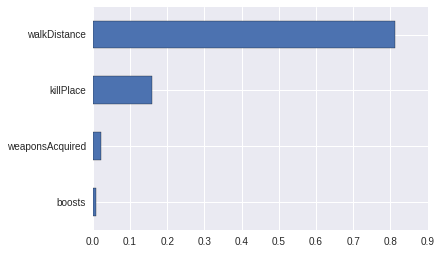

In [5]:
###############################################################
#               Random Forest Classifier                      #
###############################################################

decision_rf = RandomForestRegressor()


fitting_rf = decision_rf.fit(features_dtc, target_dtc)

# Look at the importance and score of the included features
feature_importances = pd.Series(decision_rf.feature_importances_, index=list_columns)
feature_importances.sort()
feature_importances.plot(kind="barh")
plt.show()

In [6]:
print("score of the Random Forest on the training dataset is " + str(decision_rf.score(features_dtc, target_dtc)))

score of the Random Forest on the training dataset is 0.946289209626


In [7]:
prediction_rf = decision_rf.predict(test_features)
solution_rf = pd.DataFrame(prediction_rf, playerId, columns = ["winPlacePerc"])
solution_rf.to_csv("solution_rf.csv", index_label = ["Id"])